# Project Problem

Investment is an activity to hand over capital to an agency, usually a company, in the hope of getting a profitable return. The probability of profit or loss that an investor will get depends on the company being invested. Companies that have good performance will provide benefits for investors. However, companies that have poor performance have the potential to go bankrupt and will cause losses to investors. It would be better for investors, be they individuals or companies that will invest, to carry out an analysis regarding the performance of the intended company. The prediction model will also be very helpful in predicting whether a company will go bankrupt or not with financial information as a predictive model variable. This project seeks to create a predictive model with a tree-based model to help investors invest so they don't invest in companies that will go bankrupt.

# Project Goal

The purpose of this project is to predict whether a company will go bankrupt or not by using financial variables. This project also conducts exploratory data analysis and feature engineering and performs testing using test data. What we will do in this project is:
1. Perform exploratory data analysis and feature engineering
2. Creating a random forest model for bankruptcy prediction
3. Evaluate and improve model performance using cross validation
4. perform hyperparameter tunning to find the best parameters for the model

This project consists of 3 parts:
1. Prepare Data
     - Imported
     - Exploratory Data Analysis (EDA)
     - Feature Engineering
2.Build Model
     - Iterate
     - Evaluate
3. Communicating Results

# Prepare Data

We will start by importing the library that will be used in this project. Next, we will try to explore and do some analysis to find out the characteristics of the data to be used.

## Import

In [43]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
sns.set()

In [2]:
# load dataset into dataframe
df = pd.read_csv("data.csv")
print("Top five dataset: ")
df.head()

Top five dataset: 


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


## Exploratory Data Analysis

In [3]:
# check data shape and info
print("Number of rows and columns: ", df.shape)
print("Check data information")
df.info()

Number of rows and columns:  (6819, 96)
Check data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                

This data has 6819 rows and 96 columns. Wow that is a large number of columns to use as a predictive model later. One of the columns that will be used as a prediction target is the bankruptcy column which contains the number 1 if the company is declared bankrupt, and the number 0 if the company is declared not bankrupt. Next, we will try to see the missing values and outliers in this data

In [4]:
# check missing value
print("Number of missing value:")
pd.options.display.max_rows = 100
df.isnull().sum()

Number of missing value:


Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
 Operating Profit Rate                                      0
 Pre-tax net Interest Rate                                  0
 After-tax net Interest Rate                                0
 Non-industry income and expenditure/revenue                0
 Continuous interest rate (after tax)                       0
 Operating Expense Rate                                     0
 Research and development expense rate                      0
 Cash flow rate                                             0
 Interest-bearing debt interest rate                        0
 Tax rate (A)                                               0
 Net Val

We can see that this data does not have any missing value. We'll try to see the outliers in just a few columns. But before that, let's take a look at the bankruptcy column to see how many companies did and did not go bankrupt

<AxesSubplot:>

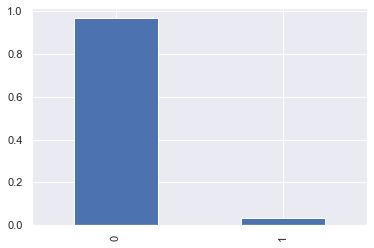

In [5]:
# create bar chart
df = df.rename(columns={"Bankrupt?":"Bankrupt"})
df["Bankrupt"].value_counts(normalize=True).plot(
    kind="bar")

The total number of companies that went bankrupt was lower than those that did not go bankrupt. Several features in the dataset contain information about each company's finances. It may be useful to understand where the values for any of these features are grouped. We will make a boxplot of one of the features to see its distribution. One of the features that we will choose is the Operating Gross Margin. This feature shows the ratio of the proportion of revenue a company earns for each sale after all expenses are deducted.

Text(0.5, 1.0, 'Distribution of Operating Gross Margin, by Class')

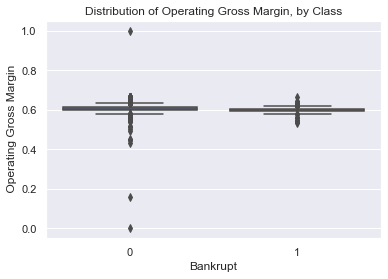

In [6]:
# create boxplot
sns.boxplot(x="Bankrupt", y=" Operating Gross Margin", data=df)
plt.title("Distribution of Operating Gross Margin, by Class")

The boxplot looks unusual and if we interpret it it looks like there are outliers.

In [7]:
df[" Operating Gross Margin"].describe()

count    6819.000000
mean        0.607948
std         0.016934
min         0.000000
25%         0.600445
50%         0.605997
75%         0.613914
max         1.000000
Name:  Operating Gross Margin, dtype: float64

We can see that the minimum value is very far from the 25% value. while the maximum value also looks far from its 75% value. Next, we will look at the distribution of these features using the histogram.

<AxesSubplot:xlabel=' Operating Gross Margin', ylabel='Count'>

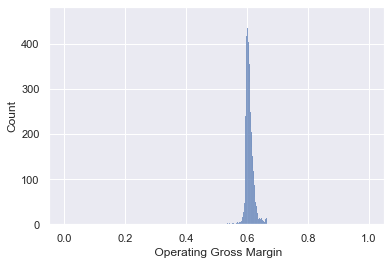

In [8]:
sns.histplot(df[" Operating Gross Margin"])

And that's right, the histogram with the shape above shows that there are outliers. We will try to handle these outliers by trimming the data

<AxesSubplot:xlabel=' Operating Gross Margin', ylabel='Count'>

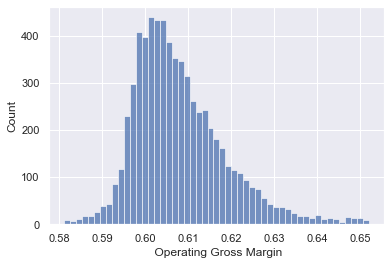

In [9]:
# removing outlier
low, high = df[" Operating Gross Margin"].quantile([0.01, 0.99])
mask = df[" Operating Gross Margin"].between(low, high)
df_check_outlier = df[mask]

# create histogram
sns.histplot(df_check_outlier[" Operating Gross Margin"])

The distribution above already looks more reasonable than before. Let's take a look at some of the other features in the data set to see what else is available

<AxesSubplot:xlabel=' Retained Earnings to Total Assets', ylabel='Count'>

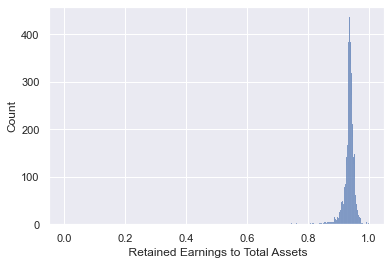

In [58]:
sns.histplot(df[" Retained Earnings to Total Assets"])

<AxesSubplot:xlabel=' Net Income to Total Assets', ylabel='Count'>

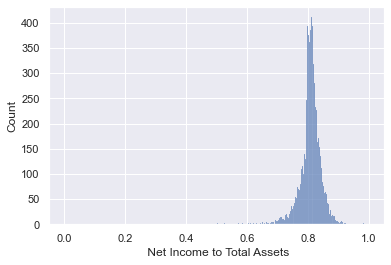

In [59]:
sns.histplot(df[" Net Income to Total Assets"])

Looking at other features, we can see that they're skewed, too. This will be important to keep in mind when we decide what type of model we want to use. Another important consideration for model selection is whether there are any issues with multicollinearity in our model. Let's check

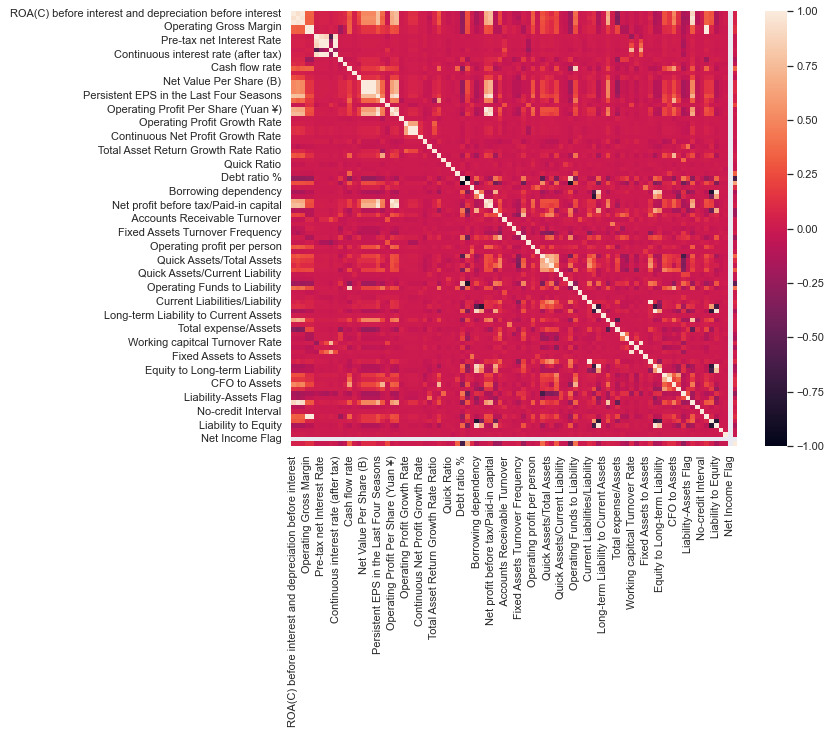

In [12]:
corr = df.drop(columns="Bankrupt").corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr);

## Feature Engineering

In this section, we will split the data to separate the predictive variable data and the target data prediction. In addition, we will oversample the imbalanced data and standardize it

### Split

In [13]:
# create target
target = df["Bankrupt"]
X = df.drop("Bankrupt", axis=1)
y = target

# check shape
print("Features shape: ", X.shape)
print("Target shape: ", y.shape)

Features shape:  (6819, 95)
Target shape:  (6819,)


In [14]:
# divide dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check shape
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5455, 95)
X_test shape: (1364, 95)
y_train shape: (5455,)
y_test shape: (1364,)


### Resample

As we can see in the Exploratory Data Analysis above, the prediction target, namely the bankrupt variable, has unbalanced data. One strategy that can be done is to resample training data. We will use the random under-sampling method

In [15]:
over_sampler = RandomOverSampler(random_state=42)
X_train_oversampling, y_train_oversampling = over_sampler.fit_resample(X_train, y_train)
print(X_train_oversampling.shape)
X_train_oversampling.head()

(10572, 95)


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.498513,0.542848,0.544622,0.599194,0.599036,0.998986,0.797412,0.809330,0.303528,0.781593,...,0.801313,0.005821,0.623649,0.599196,0.840580,0.282564,0.027239,0.566658,1,0.022512
1,0.506606,0.562309,0.558863,0.609334,0.609334,0.999027,0.797450,0.809375,0.303508,0.781637,...,0.810914,0.000481,0.623932,0.609332,0.841339,0.280570,0.026843,0.565395,1,0.026670
2,0.508799,0.561001,0.554687,0.614242,0.614055,0.999094,0.797533,0.809424,0.303514,0.781692,...,0.809740,0.001397,0.623714,0.614241,0.840969,0.277772,0.026864,0.565484,1,0.041556
3,0.499976,0.562527,0.546764,0.597825,0.597825,0.999004,0.797411,0.809329,0.303490,0.781590,...,0.810082,0.000998,0.623986,0.597824,0.841885,0.286871,0.026951,0.565820,1,0.018173
4,0.477892,0.547700,0.529150,0.600362,0.600362,0.998975,0.797412,0.809333,0.303551,0.781584,...,0.804638,0.002826,0.623845,0.600363,0.840885,0.282073,0.026959,0.565848,1,0.023328


We have successfully oversampled the training set with a total of 10572 observations and 95 features. Next we will create a model for prediction

A little conclusion in the data preparation stage, we find that the data does not have a missing value. This is a good situation for our model. However, we have imbalanced data and there are autocorrelation issues shown in the heatmap graphic above. This means that we would be better off using a tree-based model than using a linear model.

# Build Model

In this section, we will create a model using the Random Forest Classifier, evaluate the model using cross validation, perform hyperparameter tuning using a grid search, and evaluate using a confusion matrix.

 ## Iterate

In [16]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_oversampling, y_train_oversampling)

RandomForestClassifier(random_state=42)

When evaluating different settings (“hyperparameters”) for the estimator, there is still a risk of overfitting the test set because the parameters can be changed until the estimator performs optimally. In this way, knowledge about the test set can "leak" into the model and the evaluation metrics no longer report generalization performance. To solve this problem, another part of the data set can be output as what is called a "validation set": training continues on the training set, after which evaluation is performed on the validation set, and when the experiment appears to be successful. , the final evaluation can be carried out on the test set.

However, by partitioning the available data into three sets, we drastically reduce the number of samples that can be used to study the model, and the results can depend on certain random choices for pairs of sets (training, validation).

The solution to this problem is a procedure called cross-validation (CV for short). The test set must still be held for the final evaluation, but the validation device is no longer needed when working on a CV.

Hyperparameter is an argument that we specify when processing the estimator instance. To determine the estimator in the decision tree, we must choose the right hyperparameter during the model building process so that the model performance is good. In determining hyperparameters or commonly called hyperparameter tunning, in this project we can use cross validation combined with grid search.

We will create a hyperparameter range for tuning our model

In [26]:
# create hyperparameter range
params = {
    "n_estimators" : range(25,100,25),
    "max_depth" : range(10,50,10)
}

Now that we have the grid hyperparameters, let's incorporate them into the search grid.

In [19]:
# create grid search cv
model = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)

Next we will do a fit on the model

In [20]:
model.fit(X_train_oversampling, y_train_oversampling)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [21]:
# extract cv result
cv_result = pd.DataFrame(model.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.660625,0.027200,0.029498,0.005142,10,25,"{'max_depth': 10, 'n_estimators': 25}",0.979196,0.977778,0.980132,0.978713,0.979659,0.979096,0.000811,11
1,3.248910,0.125843,0.037224,0.010604,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.979669,0.979196,0.980132,0.979186,0.979186,0.979474,0.000378,10
2,4.020206,0.193266,0.035675,0.001512,10,75,"{'max_depth': 10, 'n_estimators': 75}",0.979196,0.980142,0.977294,0.979659,0.978713,0.979001,0.000977,12
3,1.549185,0.014044,0.018476,0.001340,20,25,"{'max_depth': 20, 'n_estimators': 25}",0.985816,0.985816,0.990066,0.988647,0.988647,0.987798,0.001700,9
4,3.094302,0.017549,0.030770,0.002527,20,50,"{'max_depth': 20, 'n_estimators': 50}",0.987234,0.987707,0.989120,0.990066,0.987701,0.988366,0.001060,8
5,4.877278,0.071902,0.048003,0.006458,20,75,"{'max_depth': 20, 'n_estimators': 75}",0.987234,0.988180,0.990066,0.989120,0.988174,0.988555,0.000963,7
6,1.825114,0.038556,0.019296,0.000812,30,25,"{'max_depth': 30, 'n_estimators': 25}",0.992435,0.992908,0.991958,0.991485,0.991485,0.992054,0.000553,6
7,3.388039,0.040739,0.031805,0.002140,30,50,"{'max_depth': 30, 'n_estimators': 50}",0.992435,0.992908,0.993377,0.994324,0.992431,0.993095,0.000707,5
8,5.163633,0.181342,0.053382,0.011605,30,75,"{'max_depth': 30, 'n_estimators': 75}",0.992435,0.992908,0.993377,0.994324,0.992904,0.993190,0.000641,4
9,1.901816,0.075791,0.025023,0.005784,40,25,"{'max_depth': 40, 'n_estimators': 25}",0.992908,0.994326,0.993851,0.993851,0.994797,0.993946,0.000627,3


In [22]:
# extract best params
best_params = model.best_params_
print(best_params)

{'max_depth': 40, 'n_estimators': 50}


We have done a cv grid search, we can see that the best model has a setting of 'max_depth': 40 and 'n_estimator' : 50. Then we don't need to create and train a new model with this setting, we can directly use model .predict() because it will automatically display predictions using the best model

In [23]:
acc_train = accuracy_score(y_train_oversampling, model.predict(X_train_oversampling))
acc_test = accuracy_score(y_test, model.predict(X_test))

print("Model Training Accuracy:", round(acc_train, 4))
print("Model Test Accuracy:", round(acc_test, 4))

Model Training Accuracy: 1.0
Model Test Accuracy: 0.9663


Finally we get a model accuracy of 96%

We will use the confusion matrix to find out all the correct positive predictions and positive observations we can identify. The confusion matrix is a table that summarizes model performance by calculating true and false negatives and true and false negatives.

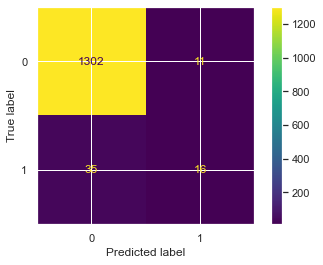

In [24]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

In [25]:
class_report = classification_report(y_test, model.predict(X_test))
print(class_report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.59      0.31      0.41        51

    accuracy                           0.97      1364
   macro avg       0.78      0.65      0.70      1364
weighted avg       0.96      0.97      0.96      1364



# Communicating results

<AxesSubplot:>

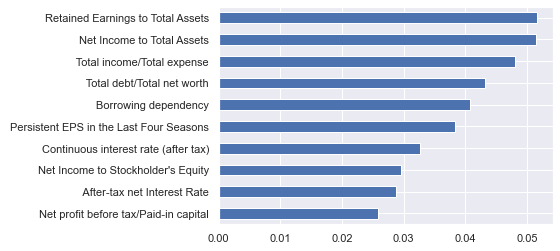

In [41]:
# create horizontal bar chart for features important
features = X_train_oversampling.columns
importances = clf.feature_importances_

features_importances = pd.Series(importances, index=features).sort_values()
features_importances.tail(10).plot(kind='barh')

In [44]:
# save model
with open("bankrupt-model-prediction.pkl", "wb") as f:
    pickle.dump(model, f)

In [52]:
def make_predictions(data_filepath, model_filepath):
    # Wrangle JSON file
    X_test = pd.read_csv(data_filepath)
    # Load model
    with open(model_filepath, "rb") as f:
        model = pickle.load(f)
    # Generate predictions
    y_test_pred = model.predict(X_test)
    # Put predictions into Series with name "bankrupt", and same index as X_test
    y_test_pred = pd.Series(y_test_pred, index=X_test.index, name="bankrupt")
    return y_test_pred

In [55]:
y_test_pred = make_predictions(
    data_filepath="test.csv",
    model_filepath="bankrupt-model-prediction.pkl",
)

print("predictions shape:", y_test_pred.shape)
y_test_pred.head()

predictions shape: (5,)


0    0
1    0
2    1
3    0
4    1
Name: bankrupt, dtype: int64

# References

https://scikit-learn.org/stable/modules/cross_validation.html#k-fold

https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction